In [1]:
# python version: python3

## DATA PREPARATION

### part a

In [2]:
import pandas as pd

# Training data:
training = pd.read_csv("training.csv")

# All training features except the label(price) 
train_x_a = training.drop("price", axis = 1)


# extracting the label feature(price), [[]] is used to reserve the dataframe type instead of series by using just []
train_y = training[["price"]]

In [3]:
train_x_a.head(2)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,...,four,141.0,mpfi,NaN,3.15,9.5,114.0,5400.0,24.0,28.0
1,gas,std,four,wagon,fwd,front,94.5,170.2,63.8,53.5,...,four,97.0,2bbl,3.15,3.29,9.4,69.0,5200.0,31.0,37.0


In [4]:
train_y.head(2)

,price
0,15985.0
1,7349.0


### part b

In [5]:
#Summary of the basic information about this DataFrame, to have an idea on both the null values and the type of each column,

training.info()

# no null values in categorical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 23 columns):
fueltype            164 non-null object
aspiration          164 non-null object
doornumber          164 non-null object
carbody             164 non-null object
drivewheel          164 non-null object
enginelocation      164 non-null object
wheelbase           156 non-null float64
carlength           160 non-null float64
carwidth            156 non-null float64
carheight           154 non-null float64
curbweight          157 non-null float64
enginetype          164 non-null object
cylindernumber      164 non-null object
enginesize          154 non-null float64
fuelsystem          164 non-null object
boreratio           152 non-null float64
stroke              160 non-null float64
compressionratio    153 non-null float64
horsepower          159 non-null float64
peakrpm             155 non-null float64
citympg             160 non-null float64
highwaympg          156 non-null float64
pr

In [6]:
# defining a function to find columns contain NAN in the dataframe
def find_non_columns(dataframe):
    #empty list
    l = []
    for i in dataframe.columns:
        #if count of NAN values in a column != 0 save the name of this column
        if dataframe[i].isnull().sum() != 0:
            l.append(i)
    return l

# column names that contain missing values
nan_columns = find_non_columns(train_x_a)


# Handling NAN in the dataframe:

# dropping categorical features so we can calculate the median
def dropping_categorical(dataframe):
    #checking the type of each column in the dataframe
    for i in dataframe.columns:
        # if the feature is not float, drop it from dataframe
        if (dataframe[["{}".format(i)]].dtypes == "object").bool() == True:
            dataframe = dataframe.drop("{}".format(i), axis = 1)
    return dataframe

# only numeric features dataset
train_x_num = dropping_categorical(train_x_a)


from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy="median")    # Setting the strategy of replacing NAN with medians
imputer.fit(train_x_num)                    # computing the median for each column feature 
medians = imputer.statistics_                 # Saving computed medians

#Check that this is the same as manually computing the median of each attribute:
medians == train_x_num.median().values 

# Imputing missing values & transforming the dataset back to Pd.dataframe
train_x_num = pd.DataFrame(imputer.transform(train_x_num), columns = train_x_num.columns,
                            index = train_x_num.index)

# Replacing the features with missing values in train_x_a with the ones filled by median
train_x_a_all = pd.concat([train_x_a.drop(columns = nan_columns) , train_x_num], axis = 1)


# Removing price-NaN rows from the label column(price)
nan_label_index = list(train_y[train_y.isnull().any(axis = 1)].index)   #indexs of NAN rows in price column
train_y = train_y.drop(nan_label_index, axis = 0).reset_index(drop = True)   # drop = True to resets the index to the default integer index

# Removing price-NaN rows from train_x_a_all
train_x_b = train_x_a_all.drop(nan_label_index, axis = 0).reset_index(drop = True) 

# Removing price-NaN rows from train_x_num:
train_x_num = train_x_num.drop(nan_label_index, axis = 0).reset_index(drop = True) 

# Checking if train_x_b contains NAN:
train_x_b.isnull().any()

fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
enginetype          False
cylindernumber      False
fuelsystem          False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginesize          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
dtype: bool

In [7]:
print(nan_columns)

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


In [8]:
train_x_b.head(2)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,wheelbase,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,four,sedan,rwd,front,ohc,four,mpfi,104.3,...,56.2,2410.0,141.0,3.31,3.15,9.5,114.0,5400.0,24.0,28.0
1,gas,std,four,wagon,fwd,front,ohc,four,2bbl,94.5,...,53.5,2024.0,97.0,3.15,3.29,9.4,69.0,5200.0,31.0,37.0


### part c

In [9]:
categorical_columns = []
# Storing column names of categorical variable in a list (categorical_columns)
for col in train_x_b.columns:
        if (train_x_b[["{}".format(col)]].dtypes == "object").bool() == True:
            categorical_columns.append(col)


In [10]:
print(categorical_columns)

['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


### part d

In [11]:
from sklearn.preprocessing import OneHotEncoder

# Converting categorical variables to numeric using OneHotEncoder 

encoder = OneHotEncoder(sparse = False, dtype = int)    # setting sparse to False so the output will be dense array 

onehot_num = encoder.fit_transform(train_x_b[categorical_columns])  #fit and transform categorical columns in the data

# Creating new list of column names to replace categorical variable names 
encoder_columns_list = []
m = 0   
for i in encoder.categories_:
    suffix = categorical_columns[m]  # Adding categorical column names as suffix to encoder columns
    m += 1
    for j in i:
        encoder_columns_list.append(j+'_{}'.format(suffix))

#converting Numpyarray to pandas dataframe
onehotencode_dataframe = pd.DataFrame(onehot_num, columns = encoder_columns_list) 

onehotencode_dataframe.head(4)


train_x_d = pd.concat([train_x_b.drop(categorical_columns, axis = 1), onehotencode_dataframe], axis = 1) 

In [12]:
train_x_d.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,three_cylindernumber,twelve_cylindernumber,two_cylindernumber,1bbl_fuelsystem,2bbl_fuelsystem,4bbl_fuelsystem,idi_fuelsystem,mfi_fuelsystem,mpfi_fuelsystem,spdi_fuelsystem
0,104.3,188.8,67.2,56.2,2410.0,141.0,3.31,3.15,9.5,114.0,...,0,0,0,0,0,0,0,0,1,0
1,94.5,170.2,63.8,53.5,2024.0,97.0,3.15,3.29,9.4,69.0,...,0,0,0,0,1,0,0,0,0,0


### part e

In [13]:
from sklearn.preprocessing import StandardScaler

#applying standardization on numeric variables:
scaler = StandardScaler().fit(train_x_num)
train_x_num_scaled = scaler.transform(train_x_num)


# converting numpy array to data frame again:
train_x_num_scaled = pd.DataFrame(train_x_num_scaled, columns = train_x_num.columns, index = train_x_num.index)

# replacing numeric features with standarized featurs 
train_x_e = pd.concat([train_x_d.drop(train_x_num.columns, axis = 1), train_x_num_scaled], axis = 1)

In [14]:
train_x_e.head(2)

,diesel_fueltype,gas_fueltype,std_aspiration,turbo_aspiration,four_doornumber,two_doornumber,convertible_carbody,hardtop_carbody,hatchback_carbody,sedan_carbody,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0,1,1,0,1,0,0,0,0,1,...,1.106358,-0.204044,0.427546,-0.000506,-0.298040,-0.115772,0.312992,0.600889,-0.213677,-0.427155
1,0,1,1,0,1,0,0,0,0,0,...,-0.087277,-0.969288,-0.679464,-0.628165,0.134277,-0.142667,-0.909358,0.150404,0.890321,0.949013


## Data Exploration

### part f

In [15]:
import matplotlib.pyplot as plt

#plotting histograms of variables
train_x_e.hist(bins=50, figsize=(20,15))
plt.show()

# from histograms we can infer:
# 1. for some numerical variables there are some extreme point such the ones in compressionratio attribute.
# 2. some variables have right-skewed distribution like wheelbase variable
# 3. all numeric variables have similar scales

<Figure size 2000x1500 with 49 Axes>

### part g

In [16]:
# adding target column to train_x_num(numerical variabels)
corr_data = pd.concat([train_x_num, train_y], axis = 1)

# Calculating correlation between every pair of continuous variables
corr = corr_data.corr()

# strongest 5 correlating variables( first attribute does not count cause it's the attribute we compare with(price))
corr["price"].abs().nlargest(6)

top_5_corr = ["enginesize", "curbweight", "horsepower","carwidth", "carlength"]

In [17]:
print(top_5_corr)

['enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength']


### part h

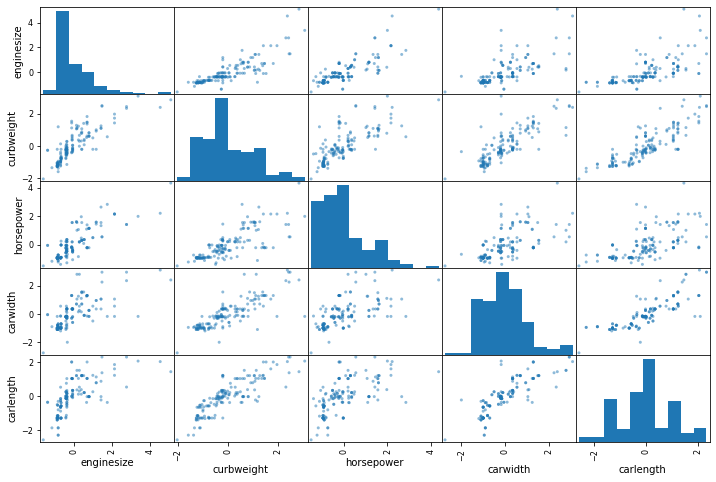

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(train_x_e[top_5_corr], figsize=(12, 8))
plt.show()

## LINEAR REGRESSION TO PREDICT CAR PRICES

### part i

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Creating the lr model
lr_model = LinearRegression()

#Training the model on train_x_e and train_y
lr_model.fit(train_x_e, train_y)

# Prediction of training set 
train_predictions = lr_model.predict(train_x_e)

# Mean Square Error (MSE) for training data
MSE_training = mean_squared_error(train_y,train_predictions)
print(MSE_training)

4292176.310954014


### part j

In [20]:
from sklearn.model_selection import cross_val_score

train_mse_score = abs(cross_val_score(lr_model, train_x_e, train_y, scoring="neg_mean_squared_error", cv=5))
print(train_mse_score)

[10015494.68044826  6661165.84773802  8006907.89379288 11512783.35483871
  7177366.78896618]


In [21]:
average_mse = train_mse_score.mean()
print(average_mse)

8674743.713156808


### part k

In [22]:
# Testing data:
testing = pd.read_csv("test.csv")

# All testing features except the label(price) 
test_x_a = testing.drop("price", axis = 1)


# extracting the label feature(price), [[]] is used to reserve the dataframe type instead of series by using just []
test_y = testing[["price"]]

# column names that contain missing values
nan_columns_test = find_non_columns(test_x_a)


# only numeric features 
test_x_num = dropping_categorical(test_x_a)

# Imputing missing values with the median found from training set & transforming the dataset back to Pd.dataframe
test_x_num = pd.DataFrame(imputer.transform(test_x_num), columns = test_x_num.columns,
                            index = test_x_num.index)

# Replacing the features with missing values in test_x_a with the ones filled by median
test_x_a = pd.concat([test_x_a.drop(columns = nan_columns_test) , test_x_num], axis = 1)

#indexs of NAN rows in price column
nan_label_index_test = list(test_y[test_y.isnull().any(axis = 1)].index)  

# Removing price-NaN rows from test_x_a
test_x_b = test_x_a.drop(nan_label_index_test, axis = 0).reset_index(drop = True) 

# Removing price-NaN rows from test_x_num:
test_x_num = test_x_num.drop(nan_label_index_test, axis = 0).reset_index(drop = True) 

# Converting categorical variables to numeric using OneHotEncoder
onehot_num_test = encoder.fit_transform(test_x_b[categorical_columns]) #same categorical columns in both train and test sets

#converting Numpyarray to pandas dataframe
onehotencode_dataframe_test = pd.DataFrame(onehot_num_test, columns = encoder_columns_list) 

test_x_d = pd.concat([test_x_b.drop(categorical_columns, axis = 1), onehotencode_dataframe_test], axis = 1)

#applying standardization on numeric variables:
test_x_num_scaled = scaler.transform(test_x_num)

# converting numpy array to data frame again:
test_x_num_scaled = pd.DataFrame(test_x_num_scaled, columns = test_x_num.columns, index = test_x_num.index)

# replacing numeric features with standarized featurs 
test_x = pd.concat([test_x_d.drop(test_x_num.columns, axis = 1), test_x_num_scaled], axis = 1)

# Removing price-NaN rows from the label column(price)
test_y = test_y.drop(nan_label_index_test, axis = 0).reset_index(drop = True)



In [23]:
test_x.head(2)

,diesel_fueltype,gas_fueltype,std_aspiration,turbo_aspiration,four_doornumber,two_doornumber,convertible_carbody,hardtop_carbody,hatchback_carbody,sedan_carbody,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0,1,1,0,1,0,0,0,0,0,...,0.885315,0.874435,0.301750,-0.471250,0.473955,-0.384726,0.204338,0.826131,-1.002247,-0.885877
1,0,1,1,0,1,0,0,0,0,1,...,0.177976,-0.279379,-0.352393,-0.628165,1.029791,-0.250249,-0.447582,0.150404,0.259465,0.337383


In [24]:
test_y.head(2)

,price
0,18920.0
1,10295.0


### part l

In [25]:
predicted_values = lr_model.predict(test_x)

In [26]:
print(predicted_values[10:13])

[[25821.12836367]
 [15266.89217591]
 [ 7234.96462755]]


In [27]:
test_mse_score = mean_squared_error(test_y,predicted_values)
print(test_mse_score)

# Printing the model's coefficients
lr_model.coef_

14477088.744741675


array([[  302.41990174,  -302.41990174,  -832.61095673,   832.61095673,
         -160.10846982,   160.10846982,  1540.90657217,   -99.71791731,
        -1138.60529083,    18.08528851,  -320.66865254,  -359.14587585,
           15.91566175,   343.23021411, -3345.9240823 ,  3345.9240823 ,
         -375.72552583,   504.56476307,  4019.44433168,   993.24625085,
        -6497.50000194,  1355.97018217,  9419.27739351, -2850.06108596,
        -4741.77180311,  -265.98081824,  3196.52464961, -6113.95851799,
         1355.97018217,   804.46589717,   119.64125564,  1355.97018217,
          302.41990174, -1238.58078103,   617.09944787, -1961.01590354,
         -184.24472871,    14.47626646,   482.17978871,   106.79417743,
         1605.85000465,  4250.28132938,   -38.5144245 , -1320.99185664,
          384.95149718,  1307.70626385,   516.79897248,  -655.36521143,
          910.41774697]])

### part m

In [50]:
from sklearn.preprocessing import PolynomialFeatures

# Creating a 2-degree polynomial feature transformer
poly_dim = PolynomialFeatures(degree=2, include_bias=False)

train_x_m = pd.DataFrame(poly_dim.fit_transform(train_x_e))

In [51]:
train_x_m.head(2)

,0,1,2,3,4,5,6,7,8,9,...,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.097964,0.188073,-0.066879,-0.133696,0.361067,-0.128396,-0.256673,0.045658,0.091273,0.182461
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.826933,-0.136771,-0.809621,-0.862993,0.022621,0.133908,0.142735,0.792671,0.844926,0.900626


In [52]:
lr_model_poly = LinearRegression()
poly_mse_score = abs(cross_val_score(lr_model_poly, train_x_m, train_y, scoring="neg_mean_squared_error", cv=5))
print(poly_mse_score)

[5.10705053e+07 2.63018054e+27 8.76452426e+26 1.23599377e+29
 1.03247688e+30]


In [53]:
average_mse = poly_mse_score.mean()
print(average_mse)

2.319165783027691e+29


### part n

In [56]:
from sklearn.linear_model import Lasso

# Creating a lasso model with default alpha = 1
lasso = Lasso()

# Performing 5-fold cross validation using lasso regression
lasso_mse_score = abs(cross_val_score(lasso, train_x_m, train_y, scoring="neg_mean_squared_error", cv=5))

C:\Users\HPi7\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9399468.709329294, tolerance: 682422.0779853245
  positive)
C:\Users\HPi7\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12600574.702536635, tolerance: 754070.2752435484
  positive)
C:\Users\HPi7\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12041876.42791847, tolerance: 814699.377570502
  positive)
C:\Users\HPi7\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1395

array([14249972.41558128, 21329052.45772722, 18277668.9215969 ,
       16597149.07007715, 89487164.08521013])

In [57]:
average_mse = lasso_mse_score.mean()
print(average_mse)

31988201.39003854


### part o

In [114]:
# define a function of Gradient Descent for lasso regression
def gradient(train_data, labels):
    avg_MSE = []
    alphas = []
    # defining iteration and step size
    for alpha in range(0, 3001, 10):
        # lasso model with different alpha values
        lasso_model = Lasso(alpha = alpha)
        # 5-fold cross validation
        error = abs(cross_val_score(lasso_model, train_data, labels, scoring="neg_mean_squared_error", cv=5))
        # avg of 5-fold error
        avg_error = error.mean()
        #saving results
        avg_MSE.append(avg_error)
        alphas.append(alpha)
    # Creating datafram
    scores = pd.DataFrame({"avg_MSE" : avg_MSE,
                          "alphas" : alphas})
    return scores
        

all_scores = gradient(train_x_m, train_y)
min_error = all_scores.nsmallest(1, "avg_MSE").values[0][0]
min_alpha = all_scores.nsmallest(1, "avg_MSE").values[0][1]



C:\Users\HPi7\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPi7\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\HPi7\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HPi7\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\HPi7\Anaconda3\lib\site-packages\sklearn\model_selection\_validatio

Minimum error was 20518865.28 at alpha 540.0


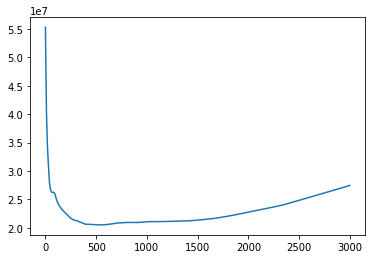

In [115]:
print(f"Minimum error was {round(min_error, 2)} at alpha {min_alpha}")

plt.plot(all_scores["alphas"],all_scores["avg_MSE"])

### part p

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import numpy as np

par_grid = [
        {'kernel': ['linear'], 'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0, 10000.0, 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}]

#building SVR model
svm_model = SVR()

#grid search
grid_search = GridSearchCV(svm_model, par_grid, cv=5, scoring ='neg_mean_squared_error', verbose=2, n_jobs=4)

#fit the model
grid_search.fit(train_x_e, train_y)


mse = grid_search.best_score_

# we mutliply by (-) to get positive mse
best_mse = np.mean(-mse)

best_parameters = grid_search.best_params_


Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:    1.8s finished
C:\Users\HPi7\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
